Q1. Explain GET and POST methods.

HTTP (Hypertext Transfer Protocol) defines several methods that can be used by clients and servers to communicate with each other. Two common methods are GET and POST:

GET Method:

Purpose: The GET method is used to request data from a specified resource.
Data in URL: Data is appended to the URL in the form of parameters. These parameters are visible in the URL, and the data is limited by the URL length constraints.
Caching: Responses to GET requests can be cached, and the data can be bookmarked or shared easily.
Idempotent: GET requests are considered idempotent, meaning that making the same request multiple times should have the same result each time and not have additional side effects.
Security Concerns: GET requests are less secure for sensitive data since the data is visible in the URL.

POST Method:

Purpose: The POST method is used to submit data to be processed to a specified resource.
Data in Body: Data is sent in the request body rather than in the URL. This makes it suitable for sending larger amounts of data, and the data is not visible in the URL.
Caching: Responses to POST requests are typically not cached, as the data submitted may lead to changes on the server.
Not Idempotent: POST requests are not considered idempotent because making the same request multiple times may result in different outcomes (e.g., if it leads to data creation or modification).
Security: POST is more secure for sensitive data as the data is not exposed in the URL.

In the context of web development, the choice between GET and POST depends on the nature of the operation. GET is typically used for safe and idempotent operations like fetching data, while POST is used for operations that may cause side effects on the server, such as submitting forms or updating resources.

Q2. Why is request used in Flask?

In Flask, the request object is used to access incoming request data when handling HTTP requests. It provides a convenient way to interact with data sent by the client, whether it's form data, URL parameters, JSON data, or other types of data included in an HTTP request. The request object is an instance of the Request class in Flask.

Here are some common use cases for the request object in Flask:

Accessing Form Data:

When a user submits an HTML form, the data is sent as part of the HTTP request. The request.form attribute allows Flask to access the form data. For example, request.form["username"] would retrieve the value of the "username" field from a form submission.
ex:
username = request.form["username"]

Accessing URL Parameters:

When data is passed in the URL (query parameters), the request.args attribute is used to access these parameters.
ex:
user_id = request.args.get("id")

Accessing JSON Data:

For requests that include data in JSON format, such as in AJAX requests or API calls, the request.json attribute can be used.
ex:
data = request.json

Handling File Uploads:

If a form includes file uploads, the request.files attribute is used to access the uploaded files.
ex:
file = request.files["file"]

Accessing Request Headers:

The request.headers attribute provides access to the HTTP headers sent with the request.
ex:
user_agent = request.headers.get("User-Agent")

Determining the HTTP Method:

The request.method attribute indicates the HTTP method used in the request (e.g., "GET", "POST").
ex:
method = request.method

Overall, the request object is an essential part of handling user input and making decisions in Flask applications based on the content of incoming HTTP requests. It simplifies the process of extracting and working with data sent by clients, making it easier to build dynamic and interactive web applications.

Q3. Why is redirect() used in Flask?

Redirecting to Another Endpoint:

After processing a form submission or performing some action, you might want to redirect the user to a different page within your Flask application. The redirect() function allows you to specify the endpoint (URL) to which the user should be redirected.
ex:
from flask import redirect, url_for

@app.route('/submit_form', methods=['POST'])
def submit_form():
    # Process form data
    # Redirect to the home page after form submission
    return redirect(url_for('home'))

Redirecting with URL Parameters:

You can include URL parameters when redirecting to another endpoint. The url_for() function is often used in conjunction with redirect() to build URLs with parameters.
ex:
from flask import redirect, url_for

@app.route('/login', methods=['POST'])
def login():
    # Validate user credentials
    # Redirect to the user profile page with the user's ID as a parameter
    return redirect(url_for('user_profile', user_id=123))

Redirecting to External URLs:

The redirect() function can also be used to redirect users to external URLs. Simply provide the complete URL as an argument.
ex:
from flask import redirect

@app.route('/external_link')
def external_link():
    # Redirect to an external website
    return redirect('https://www.example.com')

Handling Redirects in Error Conditions:

In some cases, you might want to redirect users to an error page or a login page when certain conditions are not met.
ex:
from flask import redirect, url_for, abort

@app.route('/protected_resource')
def protected_resource():
    # Check if the user is authenticated
    if not user_authenticated():
        # Redirect to the login page if not authenticated
        return redirect(url_for('login'))
    # Render the protected resource
    return render_template('protected_resource.html')


Overall, the redirect() function is a useful tool for managing the flow of a Flask application by directing users to the appropriate pages based on their actions or the application's logic.

Q4. What are templates in Flask? Why is the render_template() function used?

In Flask, templates are used to separate the HTML presentation logic from the Python application logic. Templates allow you to create dynamic web pages by embedding variables, control structures, and other dynamic elements within HTML files. This separation of concerns makes it easier to maintain and update web applications.

The render_template() function in Flask is used to render HTML templates. It takes the name of the template file as an argument, along with any additional data that needs to be passed to the template. This function is part of the Flask render_template module.
Here's how templates work in Flask:

Template Files:

Template files are typically stored in a folder named "templates" within the Flask project directory. Flask looks for templates in this folder by default.

#### Example directory structure:
/your_flask_project
    /templates
        index.html
        results.html

Creating Templates:

Template files are HTML files with special syntax that allows the embedding of dynamic content. Flask uses the Jinja2 template engine to render these templates.
#### Example "index.html" template:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ title }}</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1> 
</body>
</html>

Using render_template():

In your Flask route functions, you use the render_template() function to render the HTML templates. You provide the name of the template file (without the "templates/" prefix) and any data you want to pass to the template.

#### Example Flask route using render_template():

from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html', title='Home Page', name='John')

Dynamic Content in Templates:

Within templates, you can use double curly braces ({{ }}) to enclose variables, which will be replaced with actual values when the template is rendered. This allows you to display dynamic content based on data passed from the server.

#### Example template snippet:

<h1>Welcome, {{ user_name }}!</h1>

#### Example Flask route passing data to the template:

@app.route('/user/<name>')
def user_profile(name):
    return render_template('profile.html', user_name=name)

In summary, templates in Flask provide a way to generate dynamic HTML content by combining HTML with dynamic elements using the Jinja2 templating engine. The render_template() function simplifies this process by rendering the specified template with the provided data, allowing you to build dynamic and interactive web applications.

Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

In [7]:
from flask import Flask,request,jsonify,render_template,url_for
import logging

logging.basicConfig(filename='trash.log',level=logging.DEBUG,format='%(asctime)s %(name)s %(levelname)s %(message)s')

app= Flask(__name__)
logging.info("Making an instance of flask class")


try:
    @app.route("/",methods=["GET","POST"])
    def home_page():
        return "<h1>&#128512;Home_Page &#128512;<h1>"
    logging.info("Using home page")    
    
    @app.route("/postman_test",methods=["POST"])
    def addition():
        if (request.method=="POST"):
            #data extraction by json request
            n1=int(request.json["num1"])
            n2=int(request.json["num2"])
            
            result=f"Your answer of addition is \U0001F600:{n1+n2}"
            return jsonify(result)
    
    if __name__=="__main__":
        app.run(host="0.0.0.0")
    logging.info("runing an API ")
    
    logging.info("Mission_Successful!")
    
except Exception as e:
    logging.error("{}".format(e))


 * Serving Flask app '__main__'
 * Debug mode: off


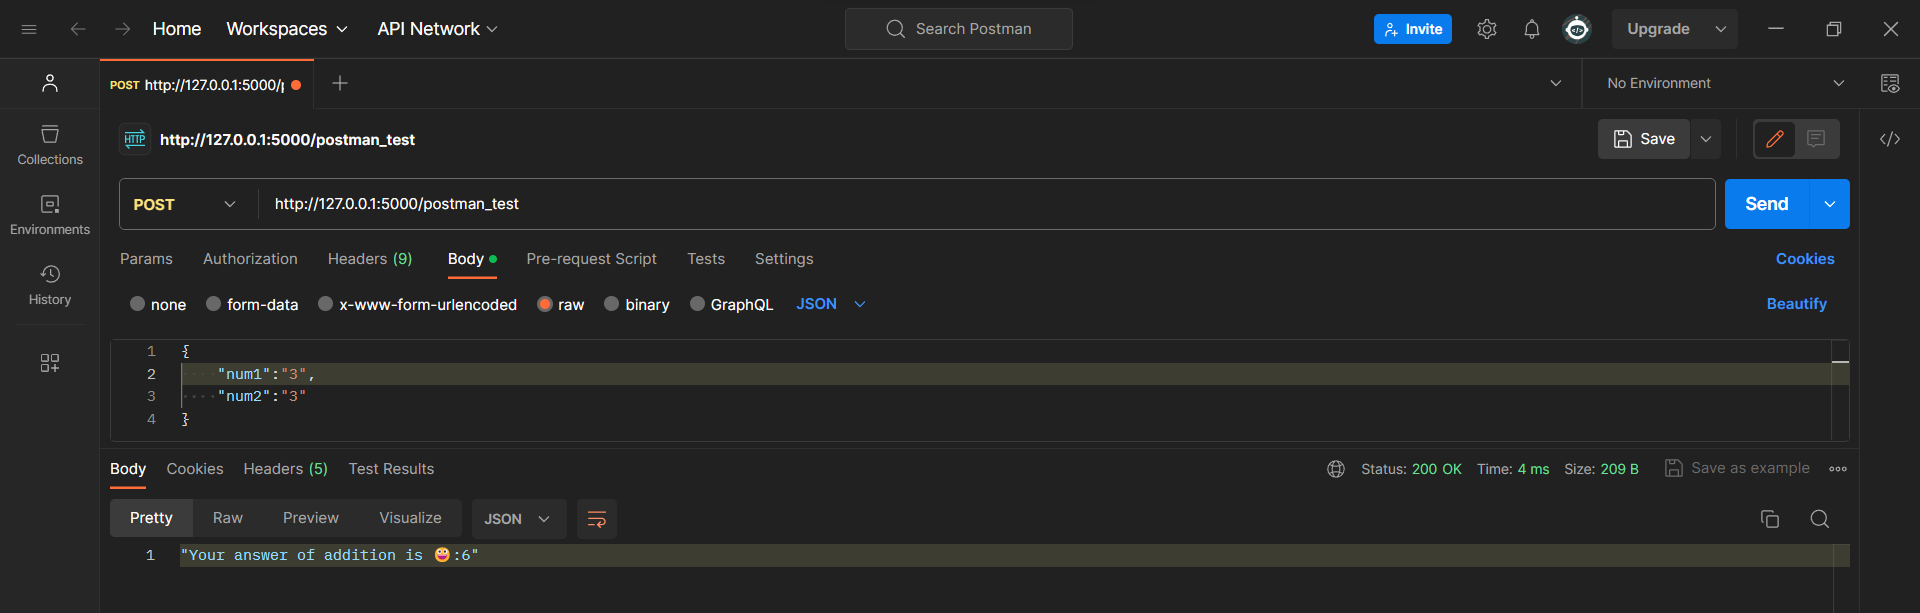

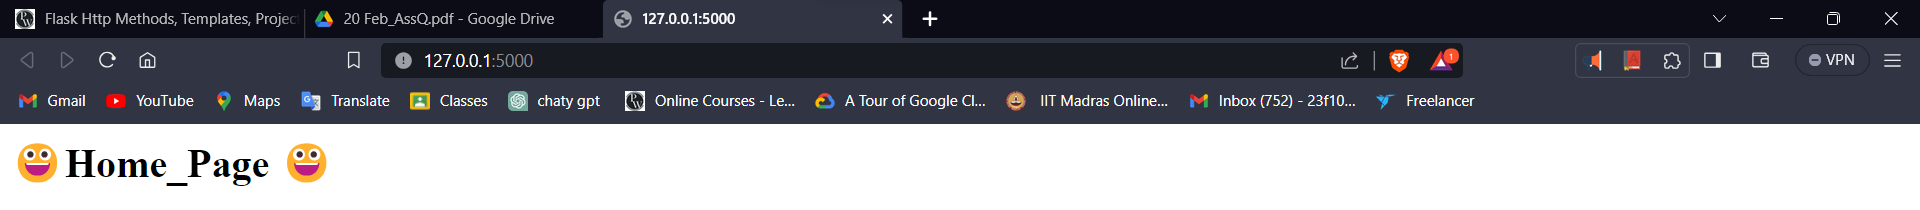